In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [2]:
data = pd.read_csv("datasets/Accident.csv")

/var/folders/fs/5xh23h99763f_blp7m50x23h0000gq/T/ipykernel_68333/3503642161.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("datasets/Accident.csv")


In [3]:
data.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218,NaN,0.0,Serious,NaN,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30,21:13,Urban,Fine no high winds,2005,No


In [51]:
# Удаление колонок с высоким процентом пропусков (более 25%)
data.dropna(axis=1, thresh=37625)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Number,Accident_Severity,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,...,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218,0.0,Serious,2005-01-04,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,...,1.0,Metropolitan Police,Wet or damp,Single carriageway,30,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450,0.0,Slight,2005-01-05,Wednesday,1.0,Auto traffic signal,Crossroads,...,5.0,Metropolitan Police,Dry,Dual carriageway,30,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0,0.0,Slight,2005-01-06,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,...,0.0,Metropolitan Police,Dry,Single carriageway,30,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220,0.0,Slight,2005-01-07,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,...,0.0,Metropolitan Police,Dry,Single carriageway,30,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0,0.0,Slight,2005-01-10,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,...,0.0,Metropolitan Police,Wet or damp,Single carriageway,30,21:13,Urban,Fine no high winds,2005,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50164,2005070502900,Unclassified,0,0.0,Serious,2005-07-03,Sunday,1.0,Give way or uncontrolled,Crossroads,...,0.0,Cheshire,Dry,Single carriageway,40,18:29,Urban,Fine no high winds,2005,No
50165,2005070502901,Unclassified,0,0.0,Slight,2005-07-03,Sunday,1.0,Give way or uncontrolled,Crossroads,...,0.0,Cheshire,Dry,Single carriageway,30,20:07,Urban,Fine no high winds,2005,No
50166,2005070502902,A,537,0.0,Serious,2005-07-03,Sunday,1.0,Data missing or out of range,Not at junction or within 20 metres,...,0.0,Cheshire,Dry,Single carriageway,60,16:04,Rural,Fine no high winds,2005,No
50167,2005070502903,B,5210,574.0,Slight,2005-07-04,Monday,2.0,Give way or uncontrolled,Roundabout,...,0.0,Cheshire,Wet or damp,Roundabout,30,16:45,Urban,Fine no high winds,2005,No


In [6]:
# Заполним пропуски средними значениями
def impute_na(df, variable, value):
    df[variable].fillna(value, inplace=True)
impute_na(data, 'Number_of_Vehicles', data['Number_of_Vehicles'].mean())

In [7]:
data.describe()

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Year
count,50169.000000,50072.000000,50159.000000,50156.000000,50156.000000,50156.000000,50156.000000,50169.000000,50169.000000,50156.000000,50159.000000,50169.000000,50169.0
mean,865.940920,298.751578,1.205188,52.491185,451681.899673,289155.002193,-1.269933,1.302338,1.827403,0.006579,0.905162,33.573521,2005.0
std,1704.128271,1100.096090,0.429536,1.079310,86087.912299,119358.039886,1.256771,0.743737,0.686198,0.103746,1.914236,9.766182,0.0
min,0.000000,0.000000,1.000000,51.289060,296300.000000,156110.000000,-3.602717,1.000000,1.000000,0.000000,0.000000,10.000000,2005.0
25%,0.000000,0.000000,1.000000,51.509316,367370.000000,180480.000000,-2.494029,1.000000,1.000000,0.000000,0.000000,30.000000,2005.0
50%,61.000000,0.000000,1.000000,51.608980,513030.000000,191740.000000,-0.372561,1.000000,2.000000,0.000000,0.000000,30.000000,2005.0
75%,574.000000,0.000000,1.000000,53.498600,531292.500000,400320.000000,-0.110122,1.000000,2.000000,0.000000,0.000000,30.000000,2005.0
max,7076.000000,8228.000000,3.000000,55.047995,559570.000000,573030.000000,0.300802,23.000000,18.000000,2.000000,8.000000,70.000000,2005.0


In [8]:
def obj_col(column): 
    return column[1] == 'object'

col_names = []
for col in list(filter(obj_col, list(zip(list(data.columns), list(data.dtypes))))):
  col_names.append(col[0])
col_names.append('Speed_limit')

In [9]:
X_ALL = data.drop(col_names, axis=1)

In [10]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

## StandardScaler

In [11]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Speed_limit'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((40135, 12), (10034, 12))

In [12]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Year
0,1.380226,-0.271571,-0.477700,-0.928463,0.859573,-0.929272,0.858369,-0.406516,-1.205791,-0.06342,0.049544,0.0
1,-0.244081,-0.271571,-0.477700,-0.899760,0.842033,-0.900702,0.842027,-0.406516,-1.205791,-0.06342,2.139172,0.0
2,-0.508148,-0.271571,-0.477700,-0.894918,0.846098,-0.895759,0.846205,-0.406516,0.251529,-0.06342,-0.472863,0.0
3,1.381400,-0.271571,-0.477700,-0.934628,0.873745,-0.935221,0.872141,-0.406516,-1.205791,-0.06342,-0.472863,0.0
4,-0.508148,-0.271571,-0.477700,-0.922296,0.887219,-0.922570,0.885862,-0.406516,-1.205791,-0.06342,-0.472863,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
50164,-0.508148,-0.271571,-0.477700,0.638403,-0.936400,0.634442,-0.926521,6.316361,1.708849,-0.06342,-0.472863,0.0
50165,-0.508148,-0.271571,-0.477700,0.556717,-0.951733,0.552335,-0.941498,0.938059,0.251529,-0.06342,-0.472863,0.0
50166,-0.193028,-0.271571,-0.477700,0.709095,-0.616375,0.704819,-0.598538,-0.406516,-1.205791,-0.06342,-0.472863,0.0
50167,2.549164,0.250206,1.850416,0.854118,-1.018177,0.851857,-1.012682,0.938059,0.251529,-0.06342,-0.472863,0.0


In [13]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

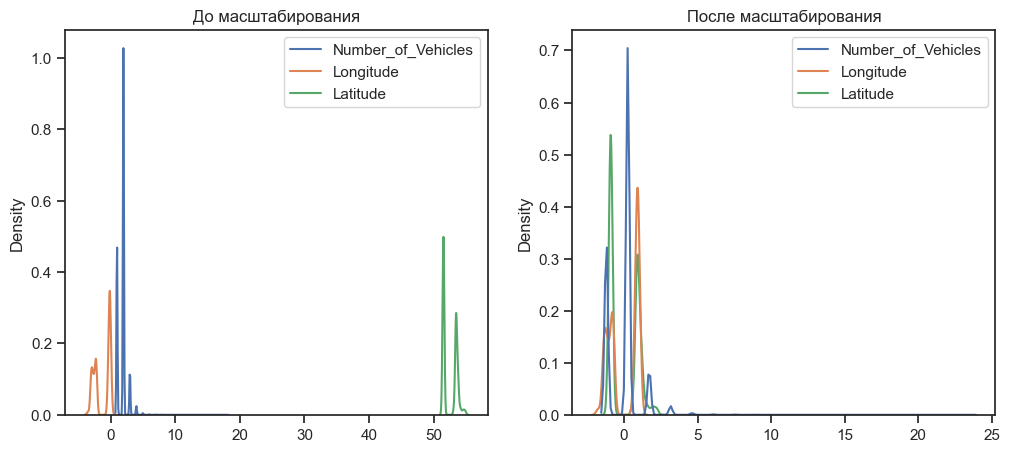

In [14]:
draw_kde(['Number_of_Vehicles', 'Longitude', 'Latitude'], data, data_cs11_scaled, 'До масштабирования', 'После масштабирования')

## Масштабирование "Mean Normalisation"

In [15]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Speed_limit'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((40135, 12), (10034, 12))

In [16]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [17]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Year
count,50169.000000,50072.000000,50159.000000,50156.000000,50156.000000,50156.000000,50156.000000,50169.000000,50169.000000,50156.000000,50159.000000,0.0
mean,-0.000535,-0.000135,-0.000419,-0.001192,0.001293,-0.001188,0.001270,-0.000113,0.000170,-0.000025,0.000120,NaN
std,0.240832,0.133702,0.214768,0.287132,0.327592,0.286285,0.322451,0.033806,0.040365,0.051873,0.239279,NaN
min,-0.122912,-0.036444,-0.103013,-0.320997,-0.589985,-0.320302,-0.597255,-0.013856,-0.048501,-0.003315,-0.113026,NaN
25%,-0.122912,-0.036444,-0.103013,-0.262402,-0.319541,-0.261849,-0.312798,-0.013856,-0.048501,-0.003315,-0.113026,NaN
50%,-0.114292,-0.036444,-0.103013,-0.235888,0.234742,-0.234842,0.231509,-0.013856,0.010323,-0.003315,-0.113026,NaN
75%,-0.041793,-0.036444,-0.103013,0.266813,0.304236,0.265446,0.298844,-0.013856,0.010323,-0.003315,-0.113026,NaN
max,0.877088,0.963556,0.896987,0.679003,0.411841,0.679698,0.404275,0.986144,0.951499,0.996685,0.886974,NaN


In [18]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [19]:
data_cs22_scaled_train.describe()

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Year
count,4.013500e+04,4.005800e+04,4.012600e+04,4.012400e+04,4.012400e+04,4.012400e+04,4.012400e+04,4.013500e+04,4.013500e+04,4.012300e+04,4.012700e+04,0.0
mean,4.558733e-18,-1.529889e-18,-3.652231e-17,2.606982e-15,6.330850e-18,-4.830040e-17,5.954541e-17,3.208817e-18,5.399664e-18,-4.427278e-19,-9.296357e-19,NaN
std,2.416528e-01,1.340982e-01,2.154150e-01,2.873328e-01,3.275957e-01,2.864881e-01,3.224602e-01,3.400279e-02,4.039157e-02,5.225562e-02,2.388316e-01,NaN
min,-1.229122e-01,-3.644368e-02,-1.030130e-01,-3.209971e-01,-5.881587e-01,-3.203017e-01,-5.957253e-01,-1.385551e-02,-4.850101e-02,-3.314807e-03,-1.130255e-01,NaN
25%,-1.229122e-01,-3.644368e-02,-1.030130e-01,-2.623026e-01,-3.206257e-01,-2.616573e-01,-3.139790e-01,-1.385551e-02,-4.850101e-02,-3.314807e-03,-1.130255e-01,NaN
50%,-1.142916e-01,-3.644368e-02,-1.030130e-01,-2.354915e-01,2.340187e-01,-2.345298e-01,2.308289e-01,-1.385551e-02,1.032251e-02,-3.314807e-03,-1.130255e-01,NaN
75%,-4.151033e-02,-3.644368e-02,-1.030130e-01,2.672322e-01,3.039605e-01,2.658540e-01,2.985749e-01,-1.385551e-02,1.032251e-02,-3.314807e-03,-1.130255e-01,NaN
max,8.770878e-01,9.635563e-01,8.969870e-01,6.790029e-01,4.118413e-01,6.796983e-01,4.042747e-01,9.861445e-01,9.514990e-01,9.966852e-01,8.869745e-01,NaN


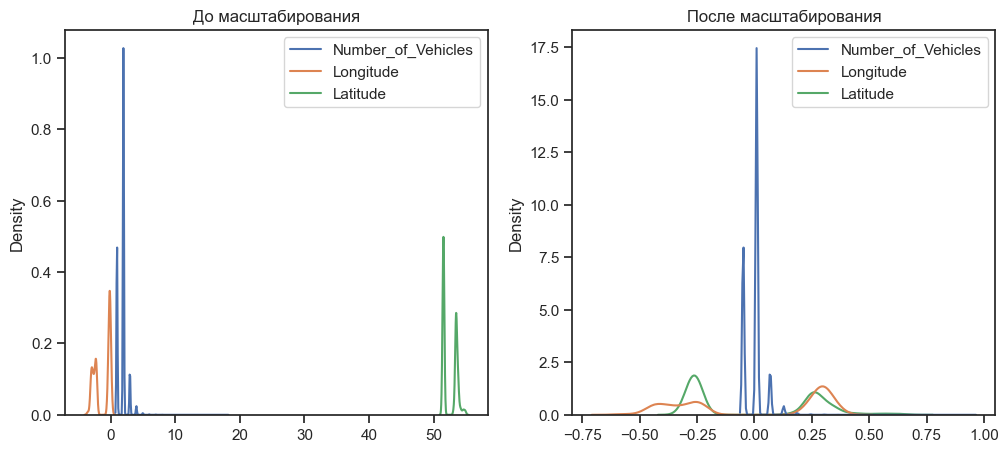

In [20]:
draw_kde(['Number_of_Vehicles', 'Longitude', 'Latitude'], data, data_cs21_scaled, 'До масштабирования', 'После масштабирования')

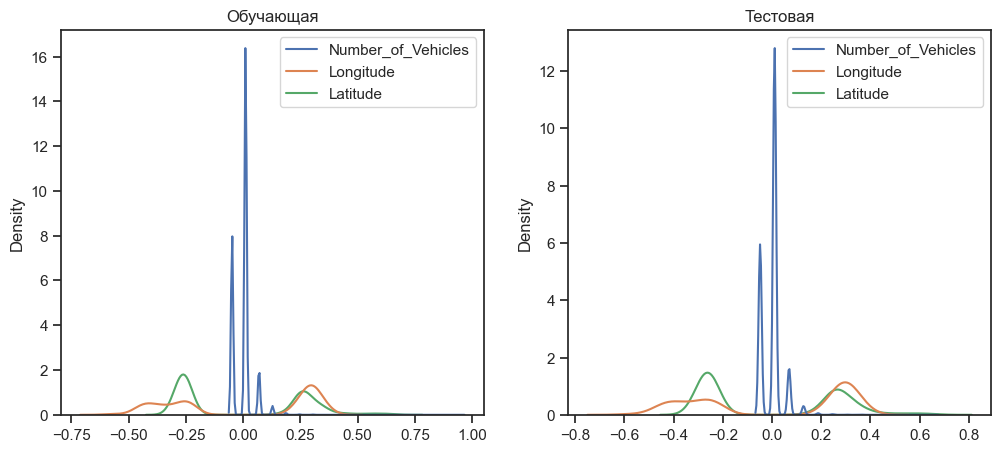

In [21]:
draw_kde(['Number_of_Vehicles', 'Longitude', 'Latitude'], data_cs22_scaled_train, data_cs22_scaled_test, 'Обучающая', 'Тестовая')

## MinMax-масштабирование

In [22]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Year
count,50169.000000,50072.000000,50159.000000,50156.000000,50156.000000,50156.000000,50156.000000,50169.000000,50169.000000,50156.000000,50159.000000,50169.0
mean,0.122377,0.036309,0.102594,0.319805,0.590200,0.319114,0.597610,0.013743,0.048671,0.003290,0.113145,0.0
std,0.240832,0.133702,0.214768,0.287132,0.326995,0.286285,0.321959,0.033806,0.040365,0.051873,0.239279,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.058595,0.269951,0.058452,0.284023,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.008621,0.000000,0.000000,0.085109,0.823223,0.085460,0.827498,0.000000,0.058824,0.000000,0.000000,0.0
75%,0.081119,0.000000,0.000000,0.587810,0.892591,0.585748,0.894730,0.000000,0.058824,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [23]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

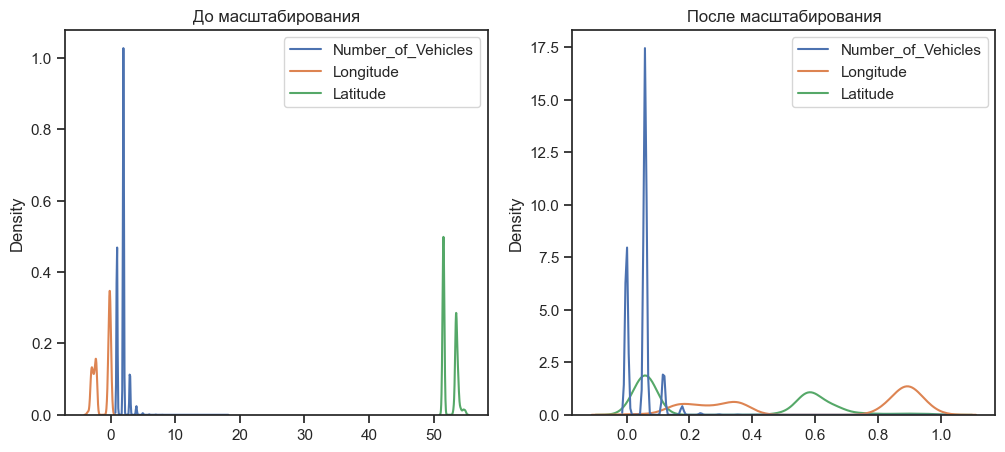

In [24]:
draw_kde(['Number_of_Vehicles', 'Longitude', 'Latitude'], data, data_cs31_scaled, 'До масштабирования', 'После масштабирования')

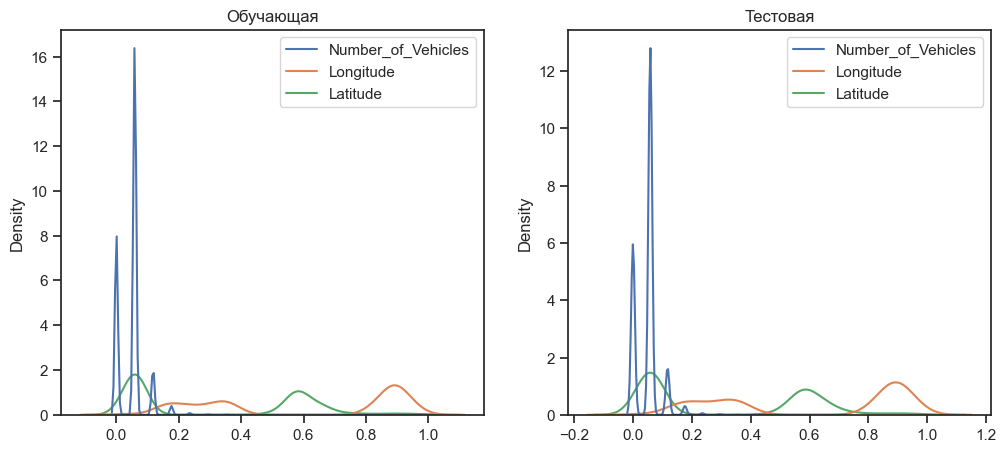

In [25]:
draw_kde(['Number_of_Vehicles', 'Longitude', 'Latitude'], data_cs32_scaled_train, data_cs32_scaled_test, 'Обучающая', 'Тестовая')

## Обработка выбросов для числовых признаков

In [26]:
data2 = pd.read_csv("datasets/Car_Sales.csv")

In [27]:
data2.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [28]:
data2.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [29]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # violinplot
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # boxplot
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

/var/folders/fs/5xh23h99763f_blp7m50x23h0000gq/T/ipykernel_68333/4201870494.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


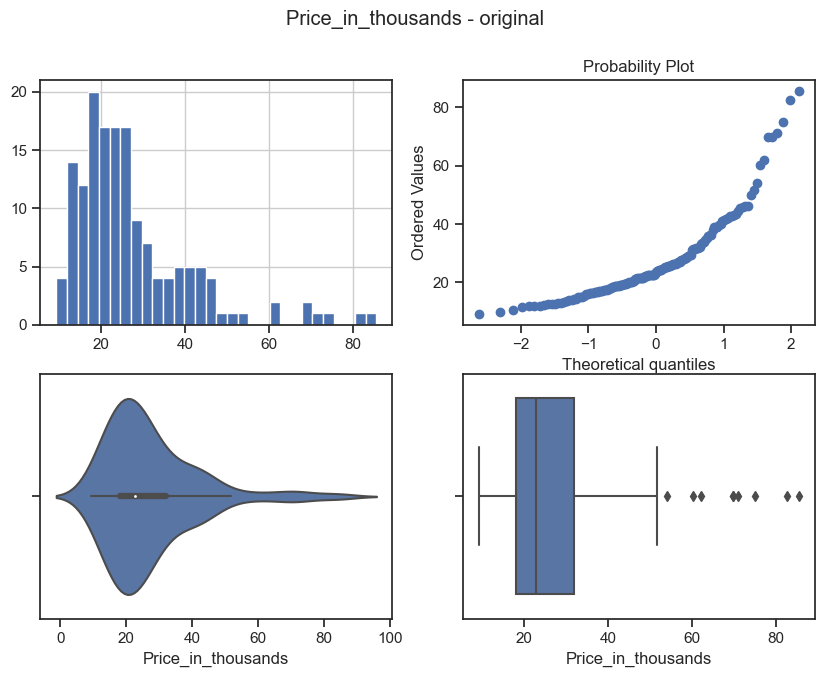

In [30]:
diagnostic_plots(data2, 'Price_in_thousands', 'Price_in_thousands - original')

/var/folders/fs/5xh23h99763f_blp7m50x23h0000gq/T/ipykernel_68333/4201870494.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


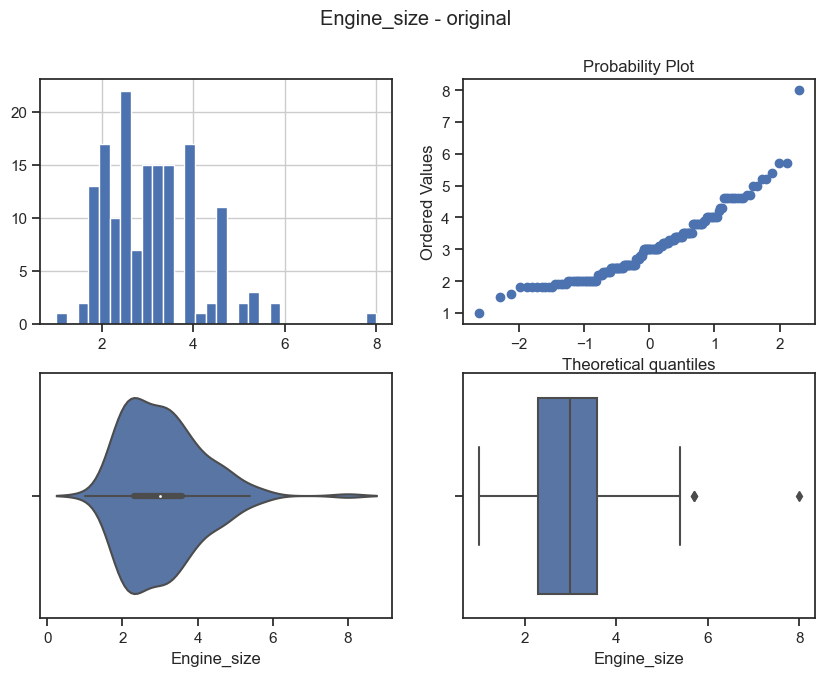

In [31]:
diagnostic_plots(data2, 'Engine_size', 'Engine_size - original')

In [32]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [33]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col):
    lower_boundary = df[col].quantile(0.05)
    upper_boundary = df[col].quantile(0.95)
    return lower_boundary, upper_boundary

## Удаление выбросов (number_of_reviews)

/var/folders/fs/5xh23h99763f_blp7m50x23h0000gq/T/ipykernel_68333/4201870494.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


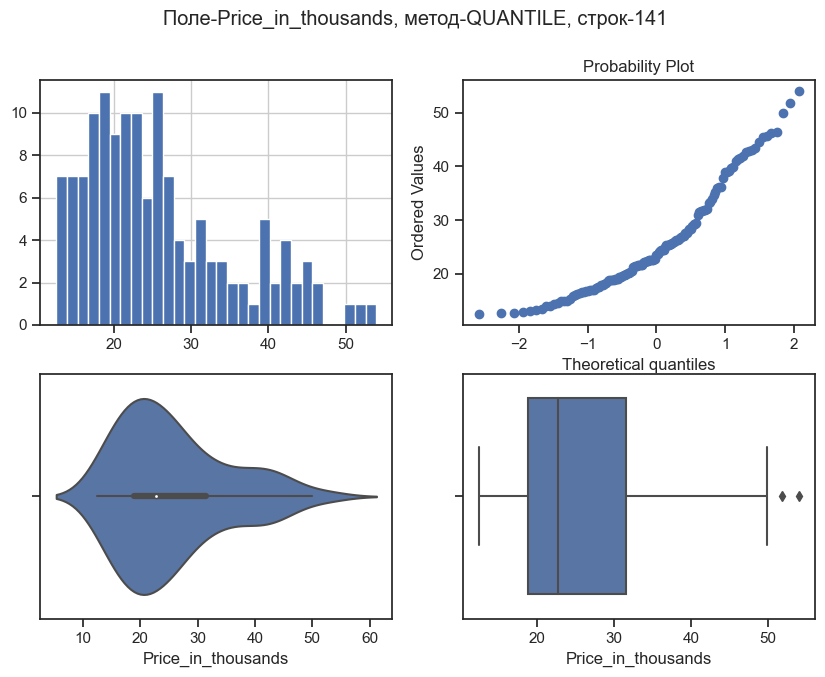

In [34]:
# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(data2, "Price_in_thousands")
# Флаги для удаления выбросов
outliers_temp = np.where(data2["Price_in_thousands"] > upper_boundary, True, 
                         np.where(data2["Price_in_thousands"] < lower_boundary, True, False))
# Удаление данных на основе флага
data_trimmed = data2.loc[~(outliers_temp), ]  
title = 'Поле-{}, метод-{}, строк-{}'.format("Price_in_thousands", "QUANTILE", data_trimmed.shape[0])
diagnostic_plots(data_trimmed, "Price_in_thousands", title)

## Замена выбросов

/var/folders/fs/5xh23h99763f_blp7m50x23h0000gq/T/ipykernel_68333/4201870494.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


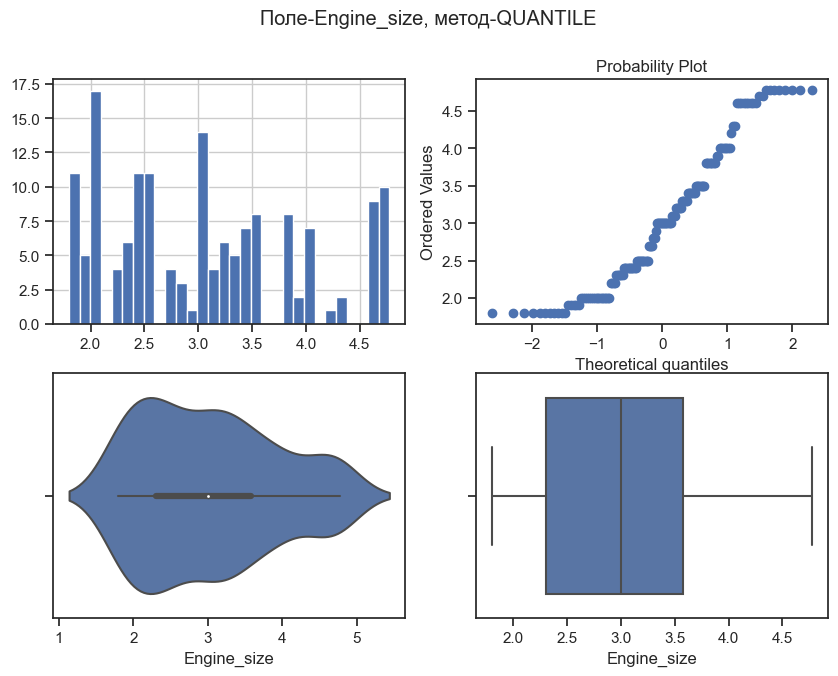

In [35]:
# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(data2, "Engine_size")
# Изменение данных
data2["Engine_size"] = np.where(data2["Engine_size"] > upper_boundary, upper_boundary,
                     np.where(data2["Engine_size"] < lower_boundary, lower_boundary, data2["Engine_size"]))
title = 'Поле-{}, метод-{}'.format("Engine_size", "QUANTILE")
diagnostic_plots(data2, "Engine_size", title)

## Обработка нестандартного признака

In [36]:
data2.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

In [37]:
# Сконвертируем дату и время в нужный формат
data2["Date"] = data2.apply(lambda x: pd.to_datetime(x["Latest_Launch"], format='%m/%d/%Y'), axis=1)

In [38]:
data2.head(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Date
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,2012-02-02
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,2011-06-03
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN,2012-01-04
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,2011-03-10
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,2011-10-08


## Отбор признаков

## Метод фильтрации (Корреляция признаков)

In [39]:
data3 = pd.read_csv("datasets/Marketing.csv")

In [40]:
data3.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


<Axes: >

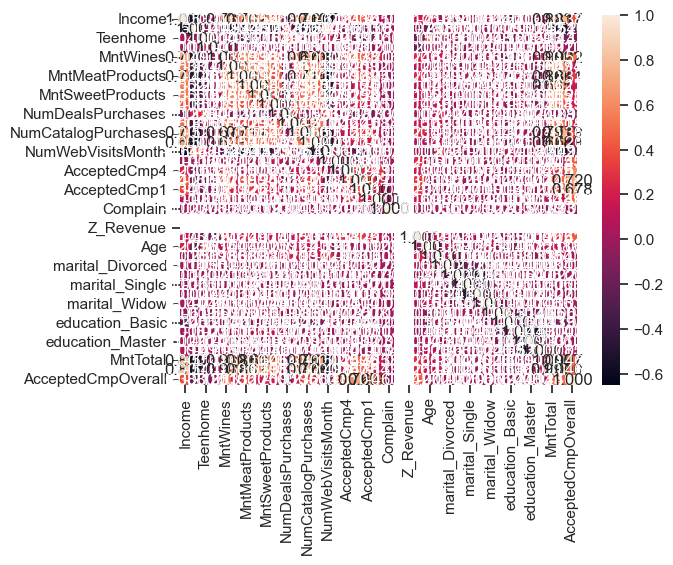

In [41]:
sns.heatmap(data3.corr(), annot=True, fmt='.3f')

In [42]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data3.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.3]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [43]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [44]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data3))

[['MntTotal',
  'MntWines',
  'MntMeatProducts',
  'Income',
  'NumCatalogPurchases',
  'NumStorePurchases',
  'MntFishProducts',
  'MntSweetProducts',
  'MntFruits',
  'Kidhome',
  'NumWebPurchases',
  'NumWebVisitsMonth',
  'AcceptedCmp5',
  'AcceptedCmpOverall',
  'MntGoldProds',
  'AcceptedCmp1',
  'MntRegularProds'],
 ['AcceptedCmpOverall', 'MntWines', 'AcceptedCmp5', 'AcceptedCmp4'],
 ['education_Graduation', 'education_PhD'],
 ['marital_Married', 'marital_Single', 'marital_Together'],
 ['AcceptedCmpOverall', 'AcceptedCmp2'],
 ['education_Graduation', 'education_Master'],
 ['AcceptedCmpOverall', 'AcceptedCmp3'],
 ['AcceptedCmpOverall', 'AcceptedCmp5', 'Response'],
 ['Teenhome', 'NumWebVisitsMonth', 'NumDealsPurchases'],
 ['Teenhome', 'Age'],
 ['education_Graduation', 'education_2n Cycle']]

## Метод из группы методов вложений

In [45]:
X3_ALL = data3.drop(['Recency'], axis=1)

In [46]:
# Разделим выборку на обучающую и тестовую
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_ALL, data3['Recency'],
                                                    test_size=0.2,
                                                    random_state=1)

In [47]:
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(X3_train, y3_train)
# Коэффициенты регрессии
e_lr1.coef_

array([[ 2.36611132e-05, -4.37617142e-01, -1.06800247e-02, ...,
        -1.63170820e-03, -8.91019230e-05, -1.06604264e+00],
       [-4.08684338e-06,  2.11252986e-01,  3.26968614e-01, ...,
         2.06092631e-04, -5.67253475e-04, -3.79701869e-02],
       [ 2.97309082e-05,  2.78608379e-01,  7.84637108e-01, ...,
         7.60268573e-04,  9.22122307e-04, -2.72190745e-01],
       ...,
       [-3.33796349e-06,  5.87316491e-01,  8.31406329e-01, ...,
         1.86837335e-04,  9.46010783e-05,  2.65448813e-02],
       [-3.64459359e-05, -1.11298763e+00,  2.33999344e-01, ...,
        -2.42398207e-04,  1.69350949e-04, -6.53642523e-02],
       [ 4.67890738e-05, -1.67844004e+00,  7.82124718e-01, ...,
        -4.24294712e-05, -6.97529794e-04,  1.87736876e-02]])

In [48]:
# Все признаки являются "хорошими"
from sklearn.feature_selection import SelectFromModel
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(X3_train, y3_train)
sel_e_lr1.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [49]:
e_lr2 = LinearSVC(C=0.01, penalty="l1", max_iter=2000, dual=False)
e_lr2.fit(X3_train, y3_train)
# Коэффициенты регрессии
e_lr2.coef_

/Users/seralekhin/BMSTU_Labs/.env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([[-8.75481522e-07,  0.00000000e+00,  0.00000000e+00, ...,
        -1.22148808e-05,  0.00000000e+00,  0.00000000e+00],
       [-1.70902922e-06,  0.00000000e+00,  0.00000000e+00, ...,
        -3.98938091e-05,  4.26048994e-05,  0.00000000e+00],
       [-3.54264966e-06,  0.00000000e+00,  0.00000000e+00, ...,
        -1.39468632e-04,  9.96158201e-05,  0.00000000e+00],
       ...,
       [-2.96785441e-06,  0.00000000e+00,  0.00000000e+00, ...,
         3.98224071e-05,  2.94380051e-04,  0.00000000e+00],
       [-3.02787186e-06,  0.00000000e+00,  0.00000000e+00, ...,
         1.29322152e-04,  0.00000000e+00,  0.00000000e+00],
       [ 4.46651443e-07,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.38467919e-04,  0.00000000e+00]])

In [50]:
# Признаки с флагом False д.б. исключены
sel_e_lr2 = SelectFromModel(e_lr2)
sel_e_lr2.fit(X3_train, y3_train)
sel_e_lr2.get_support()

/Users/seralekhin/BMSTU_Labs/.env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([ True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False])